# Configuración Inicial

In [1]:
import nltk
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px


[nltk_data] Error loading book: <urlopen error [Errno -2] Name or
[nltk_data]     service not known>


*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


## Bi-gramas
* Parejas de palabras que ocurren consecutivas.

In [2]:
# frecuencia de distribucion de la cantidad de veces que aparecen los bigramas
md_bigrams = list(bigrams(text1))
fdist = FreqDist(md_bigrams)

Aqui podemos obtener los bi-gramas más frecuentes en este texto:

In [3]:
fdist.most_common(10)

[((',', 'and'), 2607),
 (('of', 'the'), 1847),
 (("'", 's'), 1737),
 (('in', 'the'), 1120),
 ((',', 'the'), 908),
 ((';', 'and'), 853),
 (('to', 'the'), 712),
 (('.', 'But'), 596),
 ((',', 'that'), 584),
 (('.', '"'), 557)]

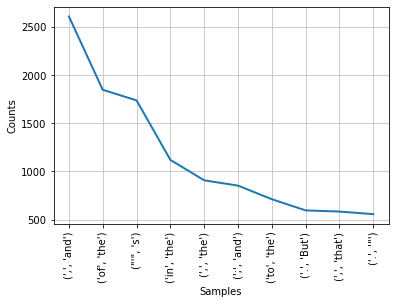

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [4]:
fdist.plot(10)

## Filtrado de bi-gramas
* Sin embargo, observamos que los bi-gramas más comunes no representan realmente frases o estructuras léxicas de interes.
* Tal vez, aplicar algun tipo de filtro nos permita ver estructuras más relevantes.

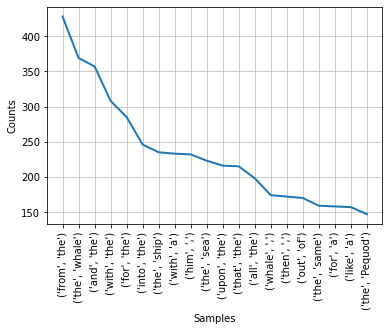

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [5]:
threshold = 2
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0]) > threshold]

filtered_dist = FreqDist(filtered_bigrams)
filtered_dist.plot(20)

## Trigramas

In [6]:
from nltk.util import ngrams

md_trigrams = list(ngrams(text1, 3))

fdist = FreqDist(md_trigrams)
fdist.most_common(10)

[((',', 'and', 'the'), 187),
 (('don', "'", 't'), 103),
 (('of', 'the', 'whale'), 101),
 ((',', 'in', 'the'), 93),
 ((',', 'then', ','), 87),
 (('whale', "'", 's'), 81),
 (('.', 'It', 'was'), 81),
 (('ship', "'", 's'), 80),
 (('the', 'Sperm', 'Whale'), 77),
 ((',', 'as', 'if'), 76)]

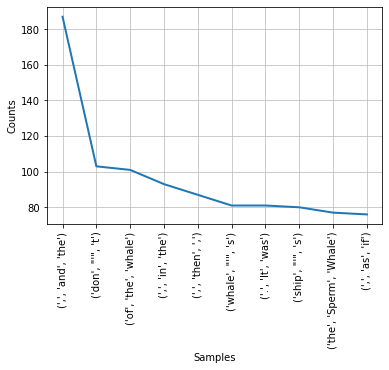

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [7]:
fdist.plot(10)

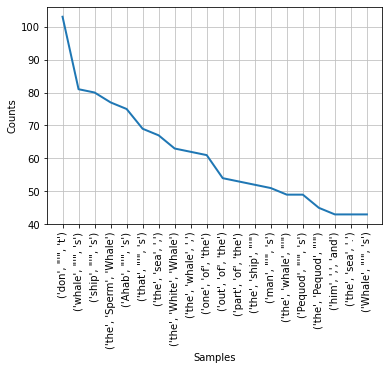

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [8]:
threshold = 2
filtered_trigrams = [
    trigram for trigram in md_trigrams if len(trigram[0]) > threshold
]

filtered_dist = FreqDist(filtered_trigrams)
filtered_dist.plot(20)

# Collocations (Colocaciones)

* Son secuencias de palabras que suelen ocurrir en textos o conversaciones con una **frecuencia inusualmente alta** [NLTK doc](http://www.nltk.org/book/ch01.html)
* Las colocaciones de una palabra son declaraciones formales de donde suele ubicarse tipicamente esa palabra [Manning & Schütze, 1990, Foundations of Statistical Natural Language Processing, Capítulo 6](https://nlp.stanford.edu/fsnlp/)

In [9]:
mb_bigrams = list(bigrams(text1))
# mb_bigrams

threshold = 2

filtered_bigrams = [bigram for bigram in mb_bigrams if len(bigram[0]) > threshold and len(bigram[1]) > threshold]
filtered_bigram_dist = FreqDist(filtered_bigrams)

# filtered_bigram_dist

filtered_words = [word for word in text1 if len(word) > threshold]

filtered_words_dist = FreqDist(filtered_words)

df = pd.DataFrame()

df['bi_gram'] = list(set(filtered_bigrams))
df['word_0'] = df['bi_gram'].apply(lambda x: x[0])
df['word_1'] = df['bi_gram'].apply(lambda x: x[1])
df['bi_gram_freq'] = df['bi_gram'].apply(lambda x: filtered_bigram_dist[x])
df['word_0_freq'] =  df['word_0'].apply(lambda x: filtered_words_dist[x])
df['word_1_freq'] =  df['word_1'].apply(lambda x: filtered_words_dist[x])


In [10]:
df

bi_gram     word_0    word_1  bi_gram_freq  word_0_freq  \
0            (the, twisted)        the   twisted             1        13721   
1          (their, intense)      their   intense             1          612   
2          (reviewed, them)   reviewed      them             1            1   
3          (headsman, when)   headsman      when             1           10   
4      (thousand, mermaids)   thousand  mermaids             1           51   
...                     ...        ...       ...           ...          ...   
67937       (clouds, sweep)     clouds     sweep             1           12   
67938         (with, where)       with     where             1         1659   
67939      (Real, strength)       Real  strength             1            1   
67940       (lively, chief)     lively     chief             1           13   
67941    (ferocious, shark)  ferocious     shark             1            2   

       word_1_freq  
0                8  
1               18  
2              471  
3              553  
4                2  
...            ...  
67937           13  
67938          190  
67939           23  
67940           30  
67941           27  

[67942 rows x 6 columns]

# Pointwise Mutual Information (PMI)

información mutua punto a punto

Una métrica basada en _teoria de la información_ para encontrar **Collocations**.

$$
PMI = \log\left(\frac{P(w_1, w_2)}{P(w_1)P(w_2)}\right)
$$

la probabilidad de aparicion del bigrama dividido entre la probabilidad de aparicion de cada palabra por separado.

si la PMI calculada es muy grande es porque probablemente es una colocación.

In [11]:
df['PMI'] = df[['bi_gram_freq', 'word_0_freq', 'word_1_freq']].apply(
    lambda x: np.log2(x.values[0] / (x.values[1] * x.values[2])), axis=1)



In [12]:
df['PMI']

0       -16.744098
1       -13.427313
2        -8.879583
3       -12.433064
4        -6.672425
           ...    
67937    -7.285402
67938   -18.265954
67939    -4.523562
67940    -8.607330
67941    -5.754888
Name: PMI, Length: 67942, dtype: float64

In [13]:
df.sort_values(by='PMI', ascending=False)

bi_gram      word_0      word_1  bi_gram_freq  \
38058         (Tekel, Upharsin)       Tekel    Upharsin             1   
14829     (residuary, legatees)   residuary    legatees             1   
24626       (genteel, comedies)     genteel    comedies             1   
44346  (shallowest, assumption)  shallowest  assumption             1   
39128      (celled, honeycombs)      celled  honeycombs             1   
...                         ...         ...         ...           ...   
63713                (man, the)         man         the             1   
50316               (some, the)        some         the             1   
30269                (one, the)         one         the             1   
51283                (the, not)         the         not             1   
64621                (the, but)         the         but             1   

       word_0_freq  word_1_freq        PMI  
38058            1            1   0.000000  
14829            1            1   0.000000  
24626            1            1   0.000000  
44346            1            1   0.000000  
39128            1            1   0.000000  
...            ...          ...        ...  
63713          508        13721 -22.732783  
50316          578        13721 -22.919024  
30269          889        13721 -23.540138  
51283        13721         1103 -23.851315  
64621        13721         1113 -23.864336  

[67942 rows x 7 columns]

El valor de PMI, se entienden que los bigramas con mas probabilidad de ser colocaciones son aquellos con valores cercanos a 0

In [14]:
df['log(bi_gram_freq)'] = df['bi_gram_freq'].apply(lambda x: np.log2(x))
df.head()

bi_gram    word_0    word_1  bi_gram_freq  word_0_freq  \
0        (the, twisted)       the   twisted             1        13721   
1      (their, intense)     their   intense             1          612   
2      (reviewed, them)  reviewed      them             1            1   
3      (headsman, when)  headsman      when             1           10   
4  (thousand, mermaids)  thousand  mermaids             1           51   

   word_1_freq        PMI  log(bi_gram_freq)  
0            8 -16.744098                0.0  
1           18 -13.427313                0.0  
2          471  -8.879583                0.0  
3          553 -12.433064                0.0  
4            2  -6.672425                0.0

In [15]:
fig = px.scatter(
  x=df['PMI'].values,
  y=df['log(bi_gram_freq)'],
  color=df['PMI'] + df['log(bi_gram_freq)'],
  hover_name=df['bi_gram'],
  width=600,
  height=600,
  labels={
    'x' : 'PMI',
    'y': 'Log(Bigram Frequency)',
  },
)
fig.show()

Los bigramas que tienen un PMI alto pero una baja frecuencia de aparicion son aquellos que aunque almacenan informacion, son poco frecuentes y no representan colocaciones en el texto, aquellos bigramas que son mas probables de ser una 

# Medidas pre-construidas en NLTK

In [16]:
# ver documentación https://www.nltk.org/_modules/nltk/metrics/association.html
from nltk.collocations import *

bigram_measure = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(text1)


In [17]:
finder.apply_freq_filter(20)
finder.nbest(bigram_measure.pmi, 10)

[('Moby', 'Dick'),
 ('Sperm', 'Whale'),
 ('White', 'Whale'),
 ('Right', 'Whale'),
 ('Captain', 'Peleg'),
 (',"', 'said'),
 ('never', 'mind'),
 ('!"', 'cried'),
 ('no', 'means'),
 ('each', 'other')]

# Textos en Español 

In [21]:
# descargamos corpus en español  https://mailman.uib.no/public/corpora/2007-October/005448.html
nltk.download('cess_esp')

corpus = nltk.corpus.cess_esp.sents()
# corpus

flatten_corpus = [w for l in corpus for w in l]
flatten_corpus


[nltk_data] Downloading package cess_esp to /home/luis/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


['El',
 'grupo',
 'estatal',
 'Electricité_de_France',
 '-Fpa-',
 'EDF',
 '-Fpt-',
 'anunció',
 'hoy',
 ',',
 'jueves',
 ',',
 'la',
 'compra',
 'del',
 '51_por_ciento',
 'de',
 'la',
 'empresa',
 'mexicana',
 'Electricidad_Águila_de_Altamira',
 '-Fpa-',
 'EAA',
 '-Fpt-',
 ',',
 'creada',
 'por',
 'el',
 'japonés',
 'Mitsubishi_Corporation',
 'para',
 'poner_en_marcha',
 'una',
 'central',
 'de',
 'gas',
 'de',
 '495',
 'megavatios',
 '.',
 'Una',
 'portavoz',
 'de',
 'EDF',
 'explicó',
 'a',
 'EFE',
 'que',
 'el',
 'proyecto',
 'para',
 'la',
 'construcción',
 'de',
 'Altamira_2',
 ',',
 'al',
 'norte',
 'de',
 'Tampico',
 ',',
 'prevé',
 'la',
 'utilización',
 'de',
 'gas',
 'natural',
 'como',
 'combustible',
 'principal',
 'en',
 'una',
 'central',
 'de',
 'ciclo',
 'combinado',
 'que',
 'debe',
 'empezar',
 'a',
 'funcionar',
 'en',
 'mayo_del_2002',
 '.',
 'La',
 'electricidad',
 'producida',
 'pasará',
 'a',
 'la',
 'red',
 'eléctrica',
 'pública',
 'de',
 'México',
 'en_virtud_

In [22]:
finder =  BigramCollocationFinder.from_documents(corpus)
finder.apply_freq_filter(10)
finder.nbest(bigram_measure.pmi, 10)

[('señora', 'Aguirre'),
 ('secretario', 'general'),
 ('elecciones', 'generales'),
 ('campaña', 'electoral'),
 ('quiere', 'decir'),
 ('Se', 'trata'),
 ('segunda', 'vuelta'),
 ('director', 'general'),
 ('primer', 'ministro'),
 ('primer', 'lugar')]

In [23]:
finder = BigramCollocationFinder.from_words(flatten_corpus)
finder.apply_freq_filter(10)
finder.nbest(bigram_measure.pmi, 10)

[('señora', 'Aguirre'),
 ('secretario', 'general'),
 ('elecciones', 'generales'),
 ('campaña', 'electoral'),
 ('quiere', 'decir'),
 ('Se', 'trata'),
 ('segunda', 'vuelta'),
 ('director', 'general'),
 ('primer', 'ministro'),
 ('primer', 'lugar')]

# Referencias para seguir aprendiendo


*   [Mas sobre Colocaciones con NLTK](http://www.nltk.org/howto/collocations.html)
*   

